# Optimizing Bids for Maximum Profit

## Problem Setup

In this problem, we are tasked with determining the optimal bid pair \( b_1 \) and \( b_2 \) to maximize the expected profit from selling flippers. The guaranteed sell price for the flippers are \$320, and the reserve price follows a uniform distribution across two intervals:

- **160 to 200**
- **250 to 300**

There is a gap between 200 and 250, where no reserve prices exist.

### Key Definitions:
- \( b_1 \): The first bid, which will be accepted if the reserve price is between 160 and \( b_1 \).
- \( b_2 \): The second bid, which will be accepted if the reserve price is between \( b_1 \) and \( b_2 \).
Note: in the problem the second bid is dependent on the average of the second bid of other players. However, for this optimisation problem we will not consider that just yet.

- **Profit Function**: The expected profit is determined by how much you pay for the flippers (the bids \( b_1 \) and \( b_2 \)) and how much the turtle's reserve price is.

### Goal:
We aim to find the optimal pair of bids \( b_1 \) and \( b_2 \) that maximize the expected profit.

## Mathematical Derivation

Here is what the reserve price distribution looks like:



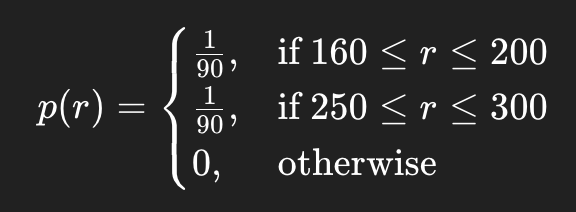

### Expected Profit Equation:

Given the uniform distribution of the reserve price \( r \) between the intervals \( [160, 200] \) and \( [250, 300] \), we can define the expected profit as:

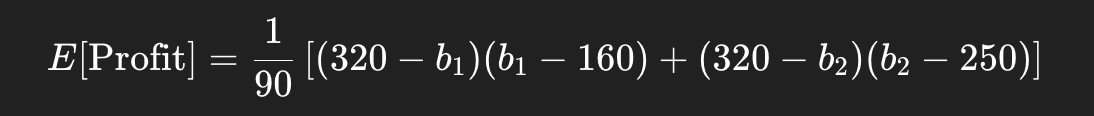

First we'll find b1

Optimal Bid 1 (b1): 200.0
Optimal Bid 2 (b2): 260.0000107996516
Optimal Expected Profit: 93.33333333333205


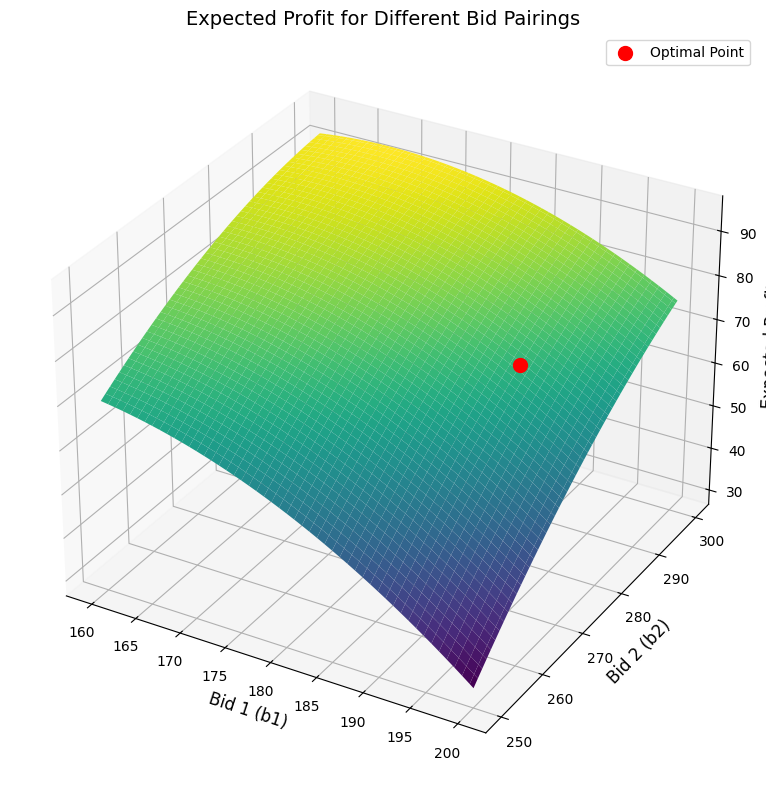

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the expected profit function
def profit_v2(b):
    b1, b2 = b[0], b[1]
    return (1/90) * ((320 - b1) * (b1 - 160) + (320 - b2) * (b2 - b1))

# Define the negative profit function for minimization
def negative_profit(b):
    return -profit_v2(b)

# Initial guess for b1 and b2
initial_guess = [175, 275]

# Use minimize to find the optimal values of b1 and b2
result = minimize(negative_profit, initial_guess, bounds=[(160, 200), (250, 300)])

# Extract the optimal b1, b2 and the corresponding profit
optimal_b1, optimal_b2 = result.x
optimal_profit = -result.fun

# Print optimal results
print(f"Optimal Bid 1 (b1): {optimal_b1}")
print(f"Optimal Bid 2 (b2): {optimal_b2}")
print(f"Optimal Expected Profit: {optimal_profit}")

# Plot the surface for the expected profit
b1_vals = np.linspace(160, 200, 100)
b2_vals = np.linspace(250, 300, 100)
B1, B2 = np.meshgrid(b1_vals, b2_vals)

# Calculate the profit values for each pair (b1, b2)
Z = np.array([[profit_v2([b1, b2]) for b2 in b2_vals] for b1 in b1_vals])

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B1, B2, Z, cmap='viridis')

# Mark the optimal point
ax.scatter(optimal_b1, optimal_b2, optimal_profit, color='r', s=100, label='Optimal Point')

# Set axis labels and title
ax.set_xlabel('Bid 1 (b1)', fontsize=12)
ax.set_ylabel('Bid 2 (b2)', fontsize=12)
ax.set_zlabel('Expected Profit', fontsize=12)
ax.set_title('Expected Profit for Different Bid Pairings', fontsize=14)

# Show the plot
ax.legend()
plt.tight_layout()
plt.show()


### Optimization

To find the optimal value of \( b_2 \), we fix \( b_1 = 200 \) and maximize the expected profit by solving for \( b_2 \).

#### Step-by-step process:

1. **First, simplify the equation** with \( b_1 = 200 \):

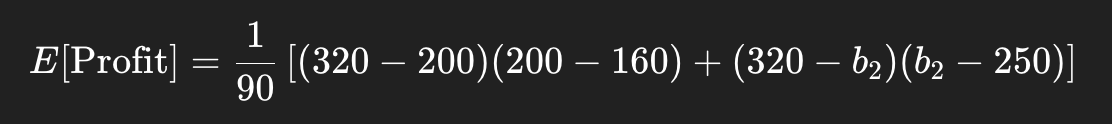

This simplifies to:

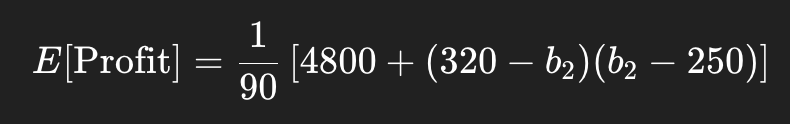

2. **Differentiate** the profit function with respect to \( b_2 \) and set the derivative equal to zero to find the optimal \( b_2 \).





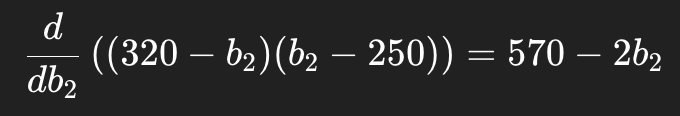

Setting this equal to zero:

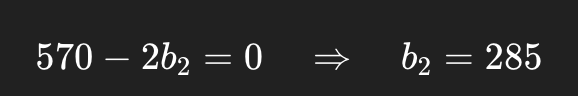


Thus, the optimal \( b_2 \) is **285** when \( b_1 = 200 \).

### Conclusion:

By fixing \( b_1 = 200 \), we find that the optimal second bid \( b_2 \) is **285**, which maximizes the expected profit to **\$66.94**.

## Code Implementation

Now, let's implement this optimization in Python to verify our result.

Optimal Bid 2 (b2): 285.0000142918136
Optimal Expected Profit: 66.94444444444218


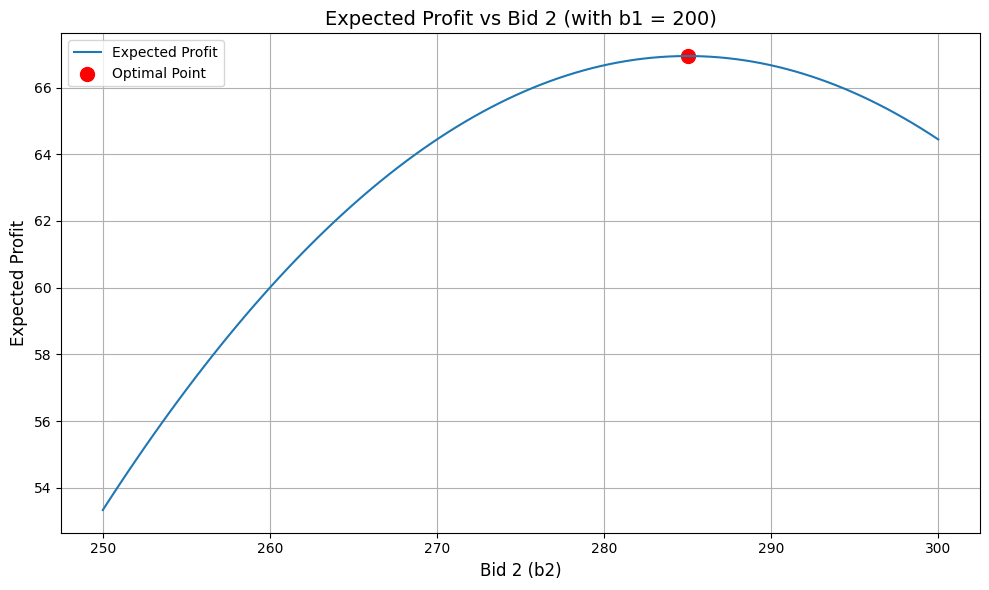

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the expected profit function with b1 fixed at 200
def profit_fixed_b1(b2):
    b1 = 200  # Fixed value of b1
    return (1/90) * ((320 - b1) * (b1 - 160) + (320 - b2) * (b2 - 250))

# Now we optimize for b2 only, as b1 is fixed at 200
result_b2 = minimize(lambda b2: -profit_fixed_b1(b2), 260, bounds=[(250, 300)])

# Extract the optimal b2 and the corresponding profit
optimal_b2_fixed_b1 = result_b2.x[0]
optimal_profit_fixed_b1 = -result_b2.fun

# Print optimal results
print(f"Optimal Bid 2 (b2): {optimal_b2_fixed_b1}")
print(f"Optimal Expected Profit: {optimal_profit_fixed_b1}")

# Plot the surface for the expected profit with b1 fixed at 200
b2_vals = np.linspace(250, 300, 100)
profits_b2 = [profit_fixed_b1(b2) for b2 in b2_vals]

# Plot the expected profit as a function of b2
plt.figure(figsize=(10, 6))
plt.plot(b2_vals, profits_b2, label='Expected Profit')
plt.scatter(optimal_b2_fixed_b1, optimal_profit_fixed_b1, color='r', s=100, label='Optimal Point')
plt.xlabel('Bid 2 (b2)', fontsize=12)
plt.ylabel('Expected Profit', fontsize=12)
plt.title('Expected Profit vs Bid 2 (with b1 = 200)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
